1-The goal of the dataset

The goal of the dataset is to develop a personalized fitness recommendation system to classify individuals into suitable fitness types for tailored workout plans and improved training efficiency.

2-The source of the dataset

https://data.mendeley.com/datasets/zw8mtbm5b9/1







3-General Information 

Structure of the Dataset
-Number of Observations:
The dataset contains 3,695 records, meaning it includes data for 3,695 different individuals.

-Number of Variables:
There are 8 relevant variables that will be used for prediction, along with one output label. These include numerical and categorical attributes describing each individual's fitness profile.


Variables and Their Types

-Sex: Represents the gender of the individual.
Possible values: Male, Female

-Age(Integer):Represents the age of the individual.

-Height(Float):Represents the height of the individual in meters.

-Weight(Float):Represents the weight of the individual in kilograms.

-BMI(Float):Calculated as Weight (kg) / Height² (m²).
It indicates whether an individual is underweight, normal weight, overweight, or obese.

-Level(Categorical):Represents the BMI classification of the individual.
Possible values: Underweight ,Normal ,Overweight,
Obese.

-Fitness Goal(Categorical):Describes the individual's primary fitness objective.
Possible values: Weight Gain ,Weight Loss


-Fitness Type(Label):This is the output variable that the model aims to predict.
Represents the recommended fitness category based on an individual's characteristics and goals.

Possible values: Muscular Fitness ,Cardio Fitness.


   ID   Sex  Age  Height  Weight Hypertension Diabetes    BMI        Level  \
0   1  Male   18    1.68    47.5           No       No  16.83  Underweight   
1   2  Male   18    1.68    47.5          Yes       No  16.83  Underweight   
2   3  Male   18    1.68    47.5           No      Yes  16.83  Underweight   
3   4  Male   18    1.68    47.5          Yes      Yes  16.83  Underweight   
4   5  Male   18    1.68    47.5           No       No  16.83  Underweight   

  Fitness Goal      Fitness Type  \
0  Weight Gain  Muscular Fitness   
1  Weight Gain  Muscular Fitness   
2  Weight Gain  Muscular Fitness   
3  Weight Gain  Muscular Fitness   
4  Weight Gain  Muscular Fitness   

                                           Exercises  \
0  Squats, deadlifts, bench presses, and overhead...   
1  Squats, deadlifts, bench presses, and overhead...   
2  Squats, yoga, deadlifts, bench presses, and ov...   
3  Squats, yoga, deadlifts, bench presses, and ov...   
4  Squats, deadlifts, bench presse

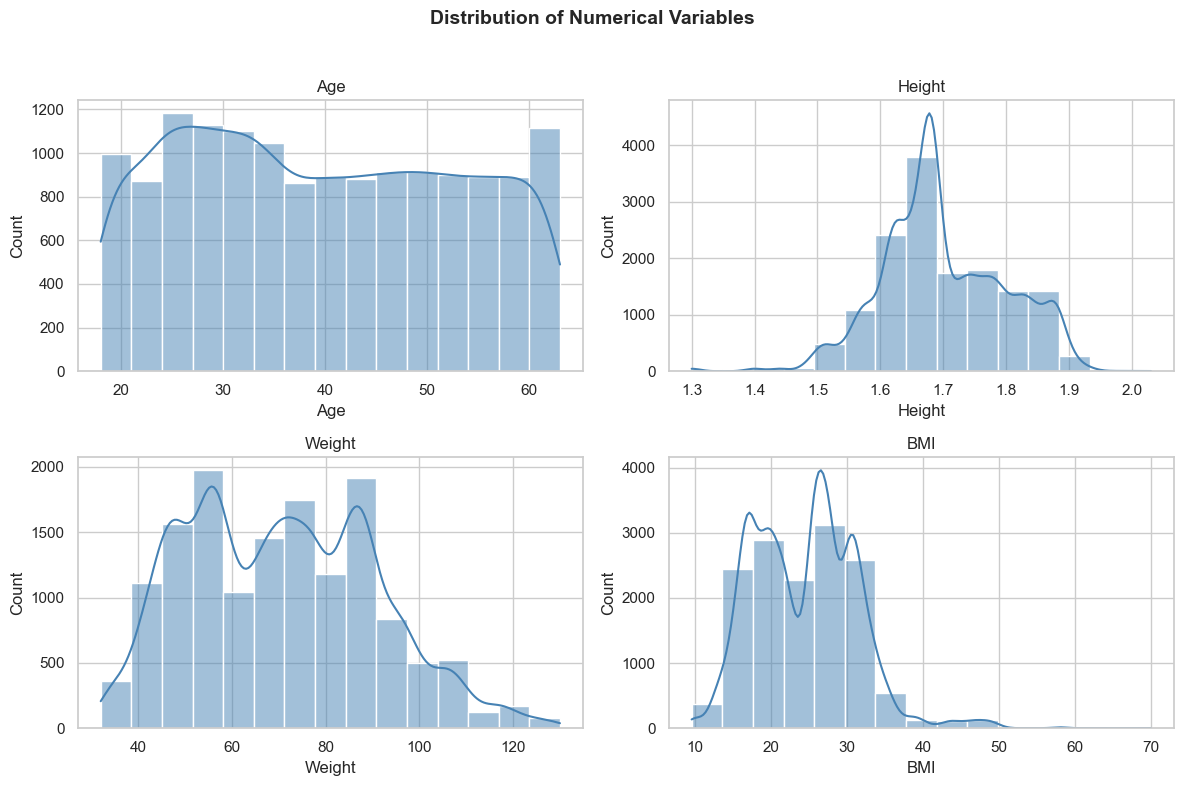

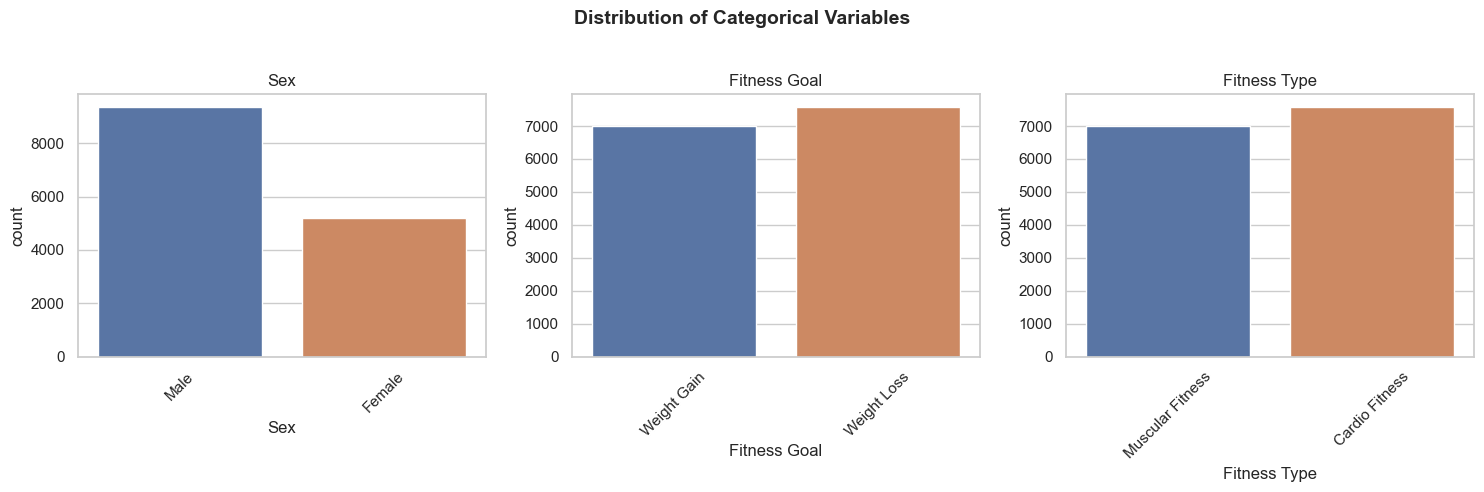

Missing Values Summary:

                Missing values in each column
ID                                          0
Sex                                         0
Age                                         0
Height                                      0
Weight                                      0
Hypertension                                0
Diabetes                                    0
BMI                                         0
Level                                       0
Fitness Goal                                0
Fitness Type                                0
Exercises                                   0
Equipment                                   0
Diet                                        0
Recommendation                              0

 No missing values found in the dataset!


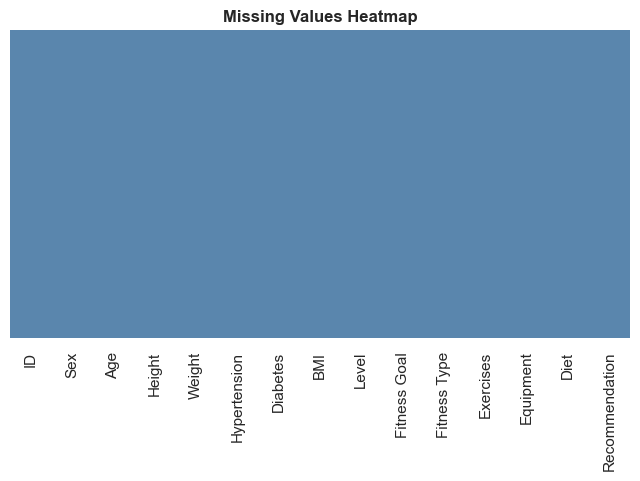



Statistical Summary:
                Age        Height        Weight           BMI
count  14589.000000  14589.000000  14589.000000  14589.000000
mean      39.554870      1.699851     70.505991     24.417569
std       13.192655      0.098129     20.030635      6.765144
min       18.000000      1.300000     32.000000      9.520000
25%       28.000000      1.640000     55.000000     18.940000
50%       39.000000      1.680000     70.000000     25.250000
75%       51.000000      1.770000     86.000000     29.320000
max       63.000000      2.030000    130.000000     70.000000

Variance of numerical variables:
Age       174.046156
Height      0.009629
Weight    401.226336
BMI        45.767170
dtype: float64


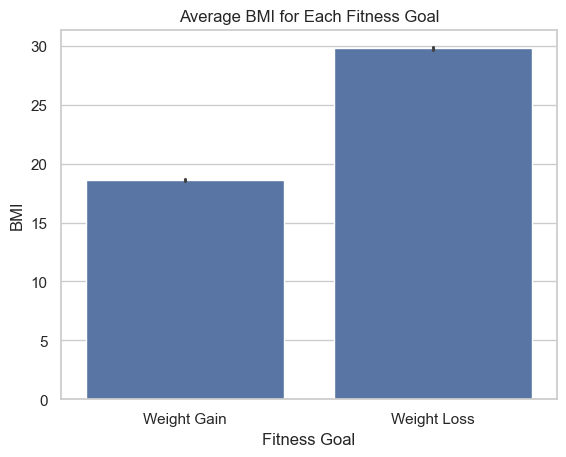

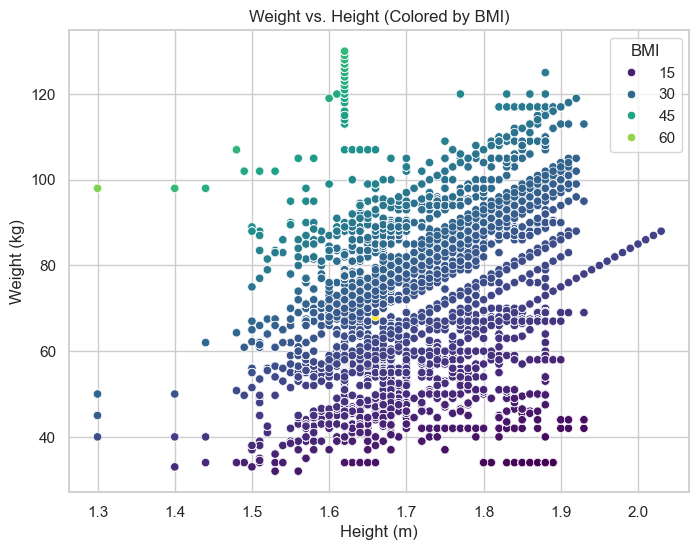

In [33]:
"4- test"
import pandas as pd

# Load the dataset from a CSV file
df = pd.read_csv('Dataset/gym_recommendation.csv')

# Display the first 5 rows of the dataset
print(df.head())


import matplotlib.pyplot as plt
import seaborn as sns

# Set the aesthetic style of the plots
sns.set(style="whitegrid")
import matplotlib.pyplot as plt
import seaborn as sns

# Set consistent style
sns.set_style("whitegrid")

# Define colors
num_color = "steelblue"
cat_color = "coral"

import matplotlib.pyplot as plt
import seaborn as sns

# Set consistent style
sns.set_style("whitegrid")

# Define colors
num_color = "steelblue"
cat_color = "coral"

# 1. Plot the distribution of numerical variables
numerical_vars = ['Age', 'Height', 'Weight', 'BMI']
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
fig.suptitle("Distribution of Numerical Variables", fontsize=14, fontweight="bold")

for i, var in enumerate(numerical_vars):
    row, col = divmod(i, 2)
    sns.histplot(df[var], bins=15, color=num_color, kde=True, ax=axes[row, col])
    axes[row, col].set_title(var)

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

# 2. Plot the distribution of categorical variables
categorical_vars = ['Sex', 'Fitness Goal', 'Fitness Type']
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle("Distribution of Categorical Variables", fontsize=14, fontweight="bold")

for i, var in enumerate(categorical_vars):
    sns.countplot(data=df, x=var, hue=var, legend=False, ax=axes[i])
    axes[i].set_title(var)
    axes[i].set_xticks(range(len(df[var].unique())))
    axes[i].set_xticklabels(df[var].unique(), rotation=45)

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


missing_values = df.isnull().sum()

# Print missing values count in a structured way
print("Missing Values Summary:\n")
print(missing_values.to_frame(name="Missing values in each column"))  # Display as a table-like format

if missing_values.sum() == 0:
    print("\n No missing values found in the dataset!")

# Heatmap of missing values
plt.figure(figsize=(8, 4))  # Adjust size for better readability
sns.heatmap(df.isnull(), cbar=False, cmap="Purples", yticklabels=False, linewidths=0.5, linecolor="#5A86AD")
plt.title("Missing Values Heatmap", fontsize=12, fontweight="bold")
plt.show()

numerical_cols = ['Age', 'Height', 'Weight', 'BMI']  

# Statistical Summary 
print("\n\nStatistical Summary:")  
print(df[numerical_cols].describe())

# Variance 
print("\nVariance of numerical variables:")  
print(df[numerical_cols].var())

# BMI vs Fitness Goal (Does a higher BMI correlate with more "Weight Loss" goals?)
sns.barplot(data=df, x="Fitness Goal", y="BMI")  
plt.title("Average BMI for Each Fitness Goal")
plt.show()

# Weight & Height VS BMI (Do weight and height strongly influence BMI?)
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Height', y='Weight', hue='BMI', palette='viridis')
plt.title('Weight vs. Height (Colored by BMI)')
plt.xlabel('Height (m)')
plt.ylabel('Weight (kg)')
plt.show()






In [ ]:
#5-Preprocessing techniques

import os
import pandas as pd
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

# Define file paths
dataset_dir = "Dataset"
file1 = os.path.join(dataset_dir, "gym_recommendation.csv")
file2 = os.path.join(dataset_dir, "gym recommendation_Cleaned.csv")

# Check if files exist
if not os.path.exists(file1):
    raise FileNotFoundError(f"File not found: {file1}")
if not os.path.exists(file2):
    raise FileNotFoundError(f"File not found: {file2}")

# Load the datasets
df_processed = pd.read_csv(file1)  # Original dataset before removing columns & duplicates
df_original_deduped = pd.read_csv(file2)  # Dataset after removing duplicates, before normalization

# 1. Variable Removal: Drop unnecessary columns
#Remove columns like Exercises, Equipment, Diet, Recommendation: For building a recommendation system focusing on Fitness Type, other details might distract the model or are not needed for the primary goal.
columns_to_drop = ["ID", "Exercises", "Equipment", "Diet", "Recommendation"]
df_full = df_processed.drop(columns=columns_to_drop, errors="ignore")

# 2. Duplicate Removal: Ensure duplicates are removed
# Remove Duplicate Rows: Duplicate entries can lead to biases in the model, as they may overrepresent certain patterns. Removing duplicates helps ensure the model is trained on diverse and unique data instances, improving generalization.
# Identify and remove duplicate rows in the original dataset
df_processed_deduped = df_full.drop_duplicates()

# 3. Variable Transformation and Encoding
#Categorical Encoding: Columns like Sex, Level, Fitness Goal should be encoded into numerical formats suitable for machine learning algorithms. This can be achieved using label encoding or one-hot encoding, depending on the model requirements.
#Label Encoding for Fitness Type: This is the target variable, so it should be label encoded for classification purposes.
categorical_cols = ["Sex", "Level", "Fitness Goal", "Hypertension", "Diabetes", "Fitness Type"]
label_encoders = {}

for col in categorical_cols:
    le = LabelEncoder()
    df_processed_deduped[col] = le.fit_transform(df_processed_deduped[col])
    label_encoders[col] = le  # Store encoder for later use

# 4. Normalization/Scaling for numerical features
#Scale Numerical Features (Age, Height, Weight, BMI): These features should be scaled to ensure they contribute equally to the model's performance. Use Min-Max scaling to normalize these features between 0 and 1.
scaler = MinMaxScaler()
numerical_columns = ["Age", "Height", "Weight", "BMI"]

df_processed_deduped[numerical_columns] = scaler.fit_transform(df_processed_deduped[numerical_columns])

# Save the processed datasets
df_original_deduped.to_csv("gym_recommendation_original_deduped.csv", index=False)
df_processed_deduped.to_csv("gym_recommendation_processed_deduped.csv", index=False)

print("✅ Preprocessing completed successfully. Files saved.")


✅ Preprocessing completed successfully. Files saved.


C:\Users\sara\AppData\Local\Temp\ipykernel_24344\982043030.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_processed_deduped[col] = le.fit_transform(df_processed_deduped[col])
C:\Users\sara\AppData\Local\Temp\ipykernel_24344\982043030.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_processed_deduped[col] = le.fit_transform(df_processed_deduped[col])
C:\Users\sara\AppData\Local\Temp\ipykernel_24344\982043030.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from

pocessed dataSet :
https://drive.google.com/file/d/1LzaFINjgOKijrT1axoikagNgde-9UjJD/view?usp=sharing